In [1]:
# All the imports

from __future__ import print_function, division
import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D, merge
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import losses
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import glob

from keras import backend as K
from keras.layers import Layer

import copy

import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, Callback, TensorBoard
from keras import backend as keras

from scipy.io import loadmat
from scipy.io import savemat

from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu

#import pylidc as pl
#from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')

#import pymrt as mrt
#import pymrt.geometry
import ipyvolume as ipv
import copy




#from image_gen import ImageDataGenerator
#from load_data import loadDataMontgomery, loadDataJSRT
#from build_model import build_UNet2D_4L

import pandas as pd
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint



import numpy
import warnings
from keras.layers import Convolution3D, Input, merge, RepeatVector, Activation
from keras.models import Model
from keras.layers.advanced_activations import PReLU
from keras import activations, initializers, regularizers
from keras.engine import Layer, InputSpec
from keras.utils.conv_utils import conv_output_length
#from keras.utils.np_utils import conv_output_length
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.engine.topology import Layer
import functools
import tensorflow as tf
import pickle
import time

Using TensorFlow backend.


In [42]:
# Helper Functions

def unet_3d_prelu(input_size = (104, 56, 40, 1)):
    
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 128
    
    zfilter = 40
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, (3, 3, zfilter), padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter1, (3, 3, zfilter), padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    
    pool2 = MaxPooling3D(pool_size=(2, 2,2))(conv2)
    conv3 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool3 = MaxPooling3D(pool_size=(2, 2,2))(conv3)
    conv4 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = ReLU()(conv4)
    conv4 = BatchNormalization()(conv4)

    up3    = UpSampling3D(size = (2,2,2))(conv4)
    merge3 = Add()([up3, conv3])
    merge3 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge3)
    merge3 = ReLU()(merge3)
    merge3 = BatchNormalization()(merge3)    
    
    up2    = UpSampling3D(size = (2,2,2))(merge3)
    merge2 = Add()([up2, conv2])
    merge2 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge2)
    merge2 = ReLU()(merge2)
    merge2 = BatchNormalization()(merge2)    
    
    up1    = UpSampling3D(size = (2,2,2))(merge2)
    merge1 = Add()([up1, conv1])
    merge1 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    merge1 = ReLU()(merge1)
    merge1 = BatchNormalization()(merge1)    
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up7 = ReLU()(up7)
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up7 = ReLU()(up7)
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up7 = ReLU()(up7)
    
    conv9 = Conv3D(1, 1, padding='same', kernel_initializer = 'he_normal')(up7)
    conv9 = ReLU()(conv9)
    
    model = Model(input = inputs, output = conv9)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'mean_absolute_error', 
                  metrics = ['mse'])
    
    return model

def unet_3d_prelu2(input_size = (104, 24, 40, 1)):
    
    filter1 = 16
    filter2 = 32
    filter3 = 128
    
    zfilter = 3
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, (3, 3, 3), padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Dropout(0.1)(conv1)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    #conv1 = Conv3D(filter1, (3, 3, zfilter), padding = 'same', kernel_initializer = 'he_normal')(conv1)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, (3, 3, 3),  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.1)(conv2)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    
    pool2 = MaxPooling3D(pool_size=(2, 2,2))(conv2)
    conv3 = Conv3D(filter3, (3, 3, 10),  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool3 = MaxPooling3D(pool_size=(2, 2,2))(conv3)
    conv4 = Conv3D(filter3, (3, 3, 5),  padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = ReLU()(conv4)
    conv4 = BatchNormalization()(conv4)

    up3    = UpSampling3D(size = (2,2,2))(conv4)
    merge3 = Concatenate()([up3, conv3])
    merge3 = Conv3D(filter2, (3, 3, 10),  padding = 'same', kernel_initializer = 'he_normal')(merge3)
    merge3 = Dropout(0.1)(merge3)
    merge3 = ReLU()(merge3)
    merge3 = BatchNormalization()(merge3)    
    
    up2    = UpSampling3D(size = (2,2,2))(merge3)
    merge2 = Concatenate()([up2, conv2])
    merge2 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge2)
    merge2 = Dropout(0.1)(merge2)
    merge2 = ReLU()(merge2)
    merge2 = BatchNormalization()(merge2)    
    
    up1    = UpSampling3D(size = (2,2,2))(merge2)
    merge1 = Concatenate()([up1, conv1])
    merge1 = Conv3D(filter1, (3, 3, 3),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    merge1 = Dropout(0.1)(merge1)
    merge1 = ReLU()(merge1)
    #merge1 = BatchNormalization()(merge1)    
    
#     up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
#     up7 = ReLU()(up7)
#     up7 = BatchNormalization()(up7)
    
#     up8 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(up7)
#     up8 = ReLU()(up8)
#     up8 = BatchNormalization()(up8)
    
#     up8 = Add()([up8, merge1])
    
#     up9 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(up8)
#     up9 = ReLU()(up9)
    
    conv9 = Conv3D(1, 1, padding='same', kernel_initializer = 'he_normal')(merge1)
    conv9 = ReLU()(conv9)
    
    model = Model(input = inputs, output = conv9)

    model.compile(optimizer = Adam(lr = 0.0005), loss = 'mean_absolute_error', 
                  metrics = ['mse'])
    return model

def unet_3d_prelu1(input_size = (104, 56, 40, 1)):
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 128
    zfilter = 40
    
    model = load_model('/media/dril/ubuntudata/DBT-NEW/models/model2.h5', compile=False)
    x     = model.layers[-3].output
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(x)
    up7 = ReLU()(up7)
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up7 = ReLU()(up7)
    
    conv9 = Conv3D(1, 1, padding='same', kernel_initializer = 'he_normal')(up7)
    conv9 = ReLU()(conv9)
    
    model1 = Model(input = model.input, output = conv9)
    model1.compile(optimizer = Adam(lr = 0.0001), loss = 'mse', metrics = ['mae'])
    
    model3 =  load_model('/media/dril/ubuntudata/DBT-NEW/models/model2.h5', compile=False)
    
    for i in range(len(model3.layers)-2):
        if len(model3.layers[i].get_weights()) > 0:
            model1.layers[i].set_weights(model3.layers[i].get_weights())
    
    return model1

def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

# For checking if weights are same or not of two networks

# for i in range(40):
#     w1 = model3.layers[i].get_weights()
#     w2 = m2.layers[i].get_weights()
    
#     for j in range(len(w1)):
#         print(i, np.all(w1[j] == w2[j]))

In [ ]:
# For getting the shapes

allshapesx = []
allshapesy = []
allshapesz = []

for i in range(1, 177):
    a = loadmat('/media/dril/ubuntudata/attenuation_values/'+str(i)+'.mat')
    a = a['head']
    b = copy.deepcopy(a)
    a[a != 0 ] = 1
    rmin, rmax, cmin, cmax, zmin, zmax = bbox2_3D(a)
    b = b[rmin:rmax, cmin:cmax, zmin:zmax]
    
    allshapesx.append(b.shape[0])
    allshapesy.append(b.shape[1])
    allshapesz.append(b.shape[2])
    
    temp = int((800-b.shape[0])/2)
    vol = b
    vol = np.pad(b, ((temp, 800-temp-b.shape[0]), (320-b.shape[1], 0), (0, 448-b.shape[2])), 
                     'constant', constant_values=(0, 0))
    vol = np.moveaxis(vol, [1, 2], [2, 1]).astype(np.single)

    h = {}
    h['head'] = vol
    savemat('/media/dril/ubuntudata/attenuation_values_cropped/'+str(i)+'.mat', h,
            do_compression=True)
    print(i, vol.shape)

In [ ]:
# New size will be 800, 320, 448

In [ ]:
# For reading the data for training the 3D U-Net model

trainx = []
trainy = []
valx   = []
valy   = []

for i in range(1, 177):
    volx = loadmat('/media/dril/ubuntudata/DBT-NEW/recons/sart_cir_zero_'+str(i)+'.mat')
    voly = loadmat('/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/'+str(i)+'.mat')
    
    volx = volx['xartt']
    voly = voly['head']
    
    voly = ndimage.zoom(voly, 0.0625, order=1).astype(np.single)
    volx = ndimage.zoom(volx, 0.125, order=1).astype(np.single)
    
    if i <= 140:
        trainx.append(np.expand_dims(volx, axis=-1))
        trainy.append(np.expand_dims(voly, axis=-1))
    else:
        valx.append(np.expand_dims(volx,axis=-1))
        valy.append(np.expand_dims(voly,axis=-1))

trainx = np.array(trainx)
trainy = np.array(trainy)
valx   = np.array(valx)
valy   = np.array(valy)

# trainx  = np.pad(trainx, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# trainy  = np.pad(trainy, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# valx    = np.pad(valx, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# valy    = np.pad(valy, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))

print(trainx.shape, trainy.shape)
print(valx.shape, valy.shape)

In [41]:
# For reading the data for training the 3D U-Net model in small patches

trainx = []
trainy = []
valx   = []
valy   = []

for i in range(1, 177):
    print(i)
    volx = loadmat('/media/dril/ubuntudata/DBT-NEW/recons/sart_cir_zero_'+str(i)+'.mat')
    voly = loadmat('/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/'+str(i)+'.mat')
    
    volx = volx['xartt']
    voly = voly['head']
    
    voly = ndimage.zoom(voly, 0.125, order=1).astype(np.single)
    volx = ndimage.zoom(volx, 0.250, order=1).astype(np.single)
    
    #print(volx.shape)
    
    gap_slice = 2
    if i <= 140:
        for j in range(5, 35, gap_slice):
            x = volx[:, j:j+20, :]
            #print(x.shape)
            trainx.append(np.expand_dims(x, axis=-1))
        
        for j in range(5, 35, gap_slice):
            y = voly[:, j:j+20, :]
            trainy.append(np.expand_dims(y, axis=-1))
    else:
        for j in range(5, 35, gap_slice):
            x = volx[:, j:j+20, :]
            valx.append(np.expand_dims(x, axis=-1))
        
        for j in range(5, 35, gap_slice):
            y = voly[:, j:j+20, :]
            valy.append(np.expand_dims(y, axis=-1))
#         for i in range(0, 81, 20):
#             x = volx[i:i+20, :, :]
#             valx.append(np.expand_dims(x, axis=-1))
        
#         for i in range(0, 81, 20):
#             y = voly[i:i+20, :, :]
#             valy.append(np.expand_dims(y, axis=-1))
        
trainx = np.array(trainx)
trainy = np.array(trainy)
valx   = np.array(valx)
valy   = np.array(valy)

# trainx  = np.pad(trainx, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# trainy  = np.pad(trainy, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# valx    = np.pad(valx, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# valy    = np.pad(valy, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))

trainx  = np.pad(trainx, ((0,0), (2, 2), (2, 2), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
trainy  = np.pad(trainy, ((0,0), (2, 2), (2, 2), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
valx    = np.pad(valx, ((0,0), (2, 2), (2, 2),  (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
valy    = np.pad(valy, ((0,0), (2, 2), (2, 2), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))


print(trainx.shape, trainy.shape)
print(valx.shape, valy.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
(2100, 104, 24, 40, 1) (2100, 104, 24, 40, 1)
(540, 104, 24, 40, 1) (540, 104, 24, 40, 1)


In [43]:
# For training the U-Net model

checkpoint  = ModelCheckpoint(filepath='/media/dril/ubuntudata/DBT-NEW/models/model20-dril.h5', 
                              monitor='val_loss', period=10, 
                              verbose=1, save_best_only=True, mode='min')
model = unet_3d_prelu2()
print(model.summary())
model.fit(trainx, trainy, validation_data=(valx, valy), 
          batch_size=4, 
          epochs=1500, callbacks=[checkpoint])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 104, 24, 40,  0                                            
__________________________________________________________________________________________________
conv3d_9 (Conv3D)               (None, 104, 24, 40,  448         input_3[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 104, 24, 40,  0           conv3d_9[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 104, 24, 40,  0           dropout_9[0][0]                  
__________________________________________________________________________________________________
batch_norm

Train on 2100 samples, validate on 540 samples
Epoch 1/1500
2100/2100 [==============================] - 43s 21ms/step - loss: 0.0566 - mean_squared_error: 0.0199 - val_loss: 0.0378 - val_mean_squared_error: 0.0143
Epoch 2/1500
2100/2100 [==============================] - 39s 19ms/step - loss: 0.0378 - mean_squared_error: 0.0106 - val_loss: 0.0328 - val_mean_squared_error: 0.0103
Epoch 3/1500
2100/2100 [==============================] - 39s 19ms/step - loss: 0.0305 - mean_squared_error: 0.0081 - val_loss: 0.0281 - val_mean_squared_error: 0.0092
Epoch 4/1500
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0259 - mean_squared_error: 0.0070 - val_loss: 0.0226 - val_mean_squared_error: 0.0071
Epoch 5/1500
2100/2100 [==============================] - 31s 15ms/step - loss: 0.0225 - mean_squared_error: 0.0063 - val_loss: 0.0200 - val_mean_squared_error: 0.0063
Epoch 6/1500
2100/2100 [==============================] - 30s 14ms/step - loss: 0.0207 - mean_squared_error: 0.00

2100/2100 [==============================] - 37s 18ms/step - loss: 0.0143 - mean_squared_error: 0.0034 - val_loss: 0.0176 - val_mean_squared_error: 0.0053
Epoch 47/1500
2100/2100 [==============================] - 37s 18ms/step - loss: 0.0142 - mean_squared_error: 0.0034 - val_loss: 0.0174 - val_mean_squared_error: 0.0052
Epoch 48/1500
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0142 - mean_squared_error: 0.0034 - val_loss: 0.0177 - val_mean_squared_error: 0.0053
Epoch 49/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0142 - mean_squared_error: 0.0034 - val_loss: 0.0176 - val_mean_squared_error: 0.0054
Epoch 50/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0142 - mean_squared_error: 0.0034 - val_loss: 0.0176 - val_mean_squared_error: 0.0052

Epoch 00050: val_loss did not improve from 0.01757
Epoch 51/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0141 - mean_squared_error: 0.0033 

2100/2100 [==============================] - 35s 17ms/step - loss: 0.0131 - mean_squared_error: 0.0026 - val_loss: 0.0172 - val_mean_squared_error: 0.0050
Epoch 93/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0131 - mean_squared_error: 0.0026 - val_loss: 0.0174 - val_mean_squared_error: 0.0050
Epoch 94/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0131 - mean_squared_error: 0.0026 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 95/1500
2100/2100 [==============================] - 39s 19ms/step - loss: 0.0131 - mean_squared_error: 0.0026 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 96/1500
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0131 - mean_squared_error: 0.0026 - val_loss: 0.0174 - val_mean_squared_error: 0.0050
Epoch 97/1500
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0131 - mean_squared_error: 0.0026 - val_loss: 0.0174 - val_mean_squared_error: 0.0051


2100/2100 [==============================] - 35s 17ms/step - loss: 0.0128 - mean_squared_error: 0.0025 - val_loss: 0.0174 - val_mean_squared_error: 0.0051
Epoch 139/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0128 - mean_squared_error: 0.0025 - val_loss: 0.0174 - val_mean_squared_error: 0.0051
Epoch 140/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0128 - mean_squared_error: 0.0025 - val_loss: 0.0171 - val_mean_squared_error: 0.0050

Epoch 00140: val_loss improved from 0.01727 to 0.01714, saving model to /media/dril/ubuntudata/DBT-NEW/models/model20-dril.h5
Epoch 141/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0128 - mean_squared_error: 0.0025 - val_loss: 0.0172 - val_mean_squared_error: 0.0050
Epoch 142/1500
2100/2100 [==============================] - 35s 17ms/step - loss: 0.0129 - mean_squared_error: 0.0025 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 143/1500
2100/2100 [============

2100/2100 [==============================] - 33s 16ms/step - loss: 0.0127 - mean_squared_error: 0.0024 - val_loss: 0.0172 - val_mean_squared_error: 0.0049
Epoch 185/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0127 - mean_squared_error: 0.0024 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 186/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0127 - mean_squared_error: 0.0024 - val_loss: 0.0175 - val_mean_squared_error: 0.0050
Epoch 187/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0127 - mean_squared_error: 0.0024 - val_loss: 0.0173 - val_mean_squared_error: 0.0051
Epoch 188/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0127 - mean_squared_error: 0.0024 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 189/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0127 - mean_squared_error: 0.0024 - val_loss: 0.0172 - val_mean_squared_error: 0.

2100/2100 [==============================] - 33s 16ms/step - loss: 0.0125 - mean_squared_error: 0.0024 - val_loss: 0.0172 - val_mean_squared_error: 0.0050

Epoch 00230: val_loss did not improve from 0.01712
Epoch 231/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0126 - mean_squared_error: 0.0024 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 232/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0125 - mean_squared_error: 0.0024 - val_loss: 0.0171 - val_mean_squared_error: 0.0049
Epoch 233/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0126 - mean_squared_error: 0.0024 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 234/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0126 - mean_squared_error: 0.0024 - val_loss: 0.0172 - val_mean_squared_error: 0.0050
Epoch 235/1500
2100/2100 [==============================] - 33s 16ms/step - loss: 0.0125 - mean_squared_error: 0.

Epoch 277/1500
2100/2100 [==============================] - 28s 13ms/step - loss: 0.0125 - mean_squared_error: 0.0024 - val_loss: 0.0173 - val_mean_squared_error: 0.0050
Epoch 278/1500
2100/2100 [==============================] - 28s 13ms/step - loss: 0.0125 - mean_squared_error: 0.0024 - val_loss: 0.0172 - val_mean_squared_error: 0.0050
Epoch 279/1500
2100/2100 [==============================] - 28s 13ms/step - loss: 0.0125 - mean_squared_error: 0.0024 - val_loss: 0.0172 - val_mean_squared_error: 0.0050
Epoch 280/1500
2100/2100 [==============================] - 28s 13ms/step - loss: 0.0125 - mean_squared_error: 0.0024 - val_loss: 0.0173 - val_mean_squared_error: 0.0050

Epoch 00280: val_loss did not improve from 0.01712
Epoch 281/1500
2100/2100 [==============================] - 28s 13ms/step - loss: 0.0125 - mean_squared_error: 0.0024 - val_loss: 0.0171 - val_mean_squared_error: 0.0049
Epoch 282/1500
2100/2100 [==============================] - 28s 13ms/step - loss: 0.0125 - mean_sq

KeyboardInterrupt: 

In [ ]:
model = load_model('/media/dril/ubuntudata/DBT-NEW/models/model18-dril.h5', compile=True)

In [44]:
result = model.predict(valx, batch_size=4)
print(result.shape)

(540, 104, 24, 40, 1)


In [4]:
# Make total Model from slices

index   = 153#random.randint(0, 35)

#volx = loadmat('/media/dril/ubuntudata/DBT-NEW/recons/sart_cir_zero_'+str(index)+'.mat')
volx = loadmat('/home/dril/newrecon/ReconDBT/sart_cir_zero.mat')
voly = loadmat('/home/dril/newrecon/ReconDBT/vol_lesion_'+str(index)+'.mat')
#voly = loadmat('/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/'+str(index)+'.mat')
    
volx = volx['xartt']
voly = voly['x']

voly = ndimage.zoom(voly, 0.250, order=1).astype(np.single)
volx = ndimage.zoom(volx, 0.250, order=1).astype(np.single)

print(volx.shape, voly.shape)

testitx = []
testity = []

for i in range(0, 80):
    x = volx[i:i+20]
    testitx.append(x)

for i in range(0, 80):
    y = voly[i:i+20]
    testity.append(y)

testitx = np.array(testitx)
testity = np.array(testity)

testitx = np.expand_dims(testitx, axis=-1)
testity = np.expand_dims(testity, axis=-1)

testitx  = np.pad(testitx, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
testity  = np.pad(testity, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))

result = model.predict(testitx, batch_size=4)

result  = result[:,  2:22, :, :, :]
testitx = testitx[:, 2:22, :, :, :]
testity = testity[:, 2:22, :, :, :]

final_result = []
for i in range(len(result)):
    final_result.append(result[i, 10, :, :, 0])

final_result = np.array(final_result)
final_result = np.concatenate([result[0, :10, :, :, 0] , final_result], axis=0)
final_result2 = np.concatenate([final_result, result[79, 10:, :, :, 0]], axis=0)

print(result.shape, final_result.shape, final_result2.shape)

# testitx = np.concatenate([testitx[0], testitx[1], testitx[2], testitx[3], testitx[4]], axis=0)
# result  = np.concatenate([result[0],  result[1], result[2], result[3], result[4]],     axis=0)
# testity = np.concatenate([testity[0], testity[1], testity[2], testity[3], testity[4]], axis=0)

#print(testity.shape, testitx.shape)
print(testity.shape, testitx.shape)

(100, 56, 40) (100, 56, 40)
(80, 20, 56, 40, 1) (90, 56, 40) (100, 56, 40)
(80, 20, 56, 40, 1) (80, 20, 56, 40, 1)


15


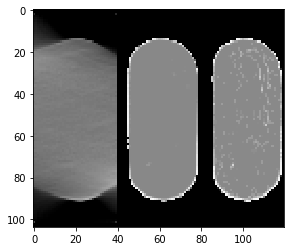

In [71]:
slicenum = 15#random.randint(0, 40)
print(slicenum)
index = random.randint(0, 500)
plt.imshow(np.concatenate([valx[index, :, 12, :, 0],  result[index, :, 12, :, 0], valy[index, :, 12, :, 0]], axis=-1), cmap='gray')

30


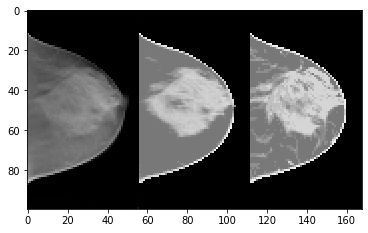

In [24]:
slicenum = 30#random.randint(0, 40)
print(slicenum)
plt.imshow(np.concatenate([volx[:, :, slicenum],  final_result1[:, :, slicenum], voly[:, :, slicenum]], axis=-1), cmap='gray')

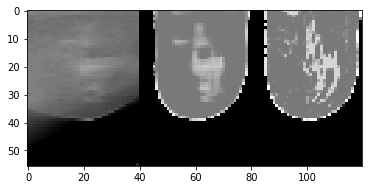

In [181]:
plt.imshow(np.concatenate([testitx[50, :, :, 0],  result[50, :, :, 0], testity[50, :, :, 0]], axis=-1), cmap='gray')

In [117]:
# Make total Model from slices

index   = random.randint(0, 35)
print(index)

testitx = []
testitx.append(valx[index*5, :, :, :, :])
testitx.append(valx[index*5+1, :, :, :, :])
testitx = np.array(testitx)

testity = []
testity.append(valy[index*5, :, :, :, :])
testity.append(valy[index*5+1, :, :, :, :])
testity = np.array(testity)

result = model.predict(testitx)

result  = result[:, 3:53, :, :, :]
testitx = testitx[:, 3:53, :, :, :]
testity = testity[:, 3:53, :, :, :]

print(result.shape)

testitx = np.concatenate([testitx[0], testitx[1]], axis=0)
result  = np.concatenate([result[0], result[1]], axis=0)
testity = np.concatenate([testity[0], testity[1]], axis=0)

print(result.shape, testity.shape, testitx.shape)

12
(2, 50, 56, 40, 1)
(100, 56, 40, 1) (100, 56, 40, 1) (100, 56, 40, 1)


In [131]:
print(trainx.shape, valx.shape)

(700, 56, 56, 40, 1) (180, 56, 56, 40, 1)


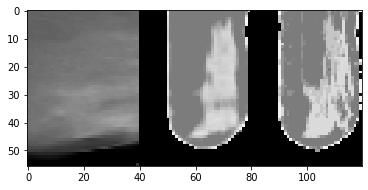

In [138]:
slicenum = 50
#plt.imshow(result[ :, :, slicenum, 0], cmap='gray')
#plt.imshow(np.concatenate([result[ :, :, slicenum, 0], testity[ :, :, slicenum, 0]], axis=-1), cmap='gray')
plt.imshow(np.concatenate([testitx[ slicenum, :, :, 0], result[ slicenum,  :, :, 0], testity[ slicenum, :, :, 0]], axis=-1), cmap='gray')

In [31]:
h         = {}
h['deep'] = result1.astype('single')
print(result1.shape)
savemat('/media/dril/ubuntudata/DBT-NEW/deeplearning_output/'+str(153)+'_1.mat', h, do_compression=True)

(400, 224, 160)


In [12]:
a       = loadmat('/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/153.mat')
a       = a['head']
a       = ndimage.zoom(a, 0.5, order=1).astype(np.single)
result1 = ndimage.zoom(final_result2[:, :, :], 4, order=0).astype(np.single)

print(a.shape, result1.shape)

(400, 224, 160) (400, 224, 160)


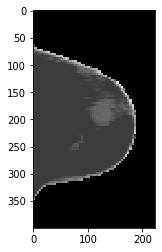

In [29]:
plt.imshow(result1[:, :, 61], cmap='gray')

(array([9.761720e+06, 3.956000e+04, 3.475364e+06, 5.981560e+05,
        2.362000e+05, 1.002920e+05, 6.330000e+04, 4.052800e+04,
        1.742400e+04, 3.456000e+03]),
 array([0.        , 0.20226216, 0.40452433, 0.6067865 , 0.80904865,
        1.0113108 , 1.213573  , 1.4158351 , 1.6180973 , 1.8203595 ,
        2.0226216 ], dtype=float32),
 <a list of 10 Patch objects>)

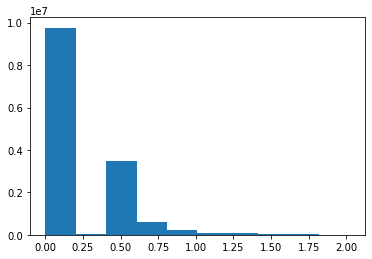

In [30]:
plt.hist(result1.flatten())

(array([9.80866e+06, 1.12800e+04, 2.17210e+04, 5.18000e+03, 5.11500e+03,
        2.82955e+06, 4.16040e+05, 2.06662e+05, 7.18750e+05, 3.13042e+05]),
 array([0.        , 0.08951333, 0.17902666, 0.26854   , 0.35805333,
        0.44756666, 0.53708   , 0.62659335, 0.71610665, 0.80561996,
        0.8951333 ], dtype=float32),
 <a list of 10 Patch objects>)

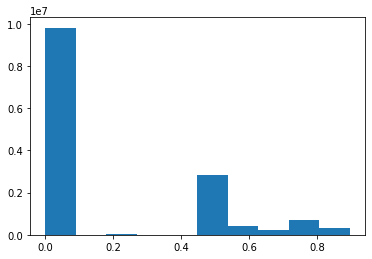

In [142]:
plt.hist(a.flatten())

(array([1.55636e+05, 4.40000e+01, 3.60000e+01, 4.70000e+01, 4.65190e+04,
        4.60100e+03, 4.45000e+03, 9.18900e+03, 2.95100e+03, 5.27000e+02]),
 array([0.        , 0.10038105, 0.20076211, 0.30114317, 0.40152422,
        0.50190526, 0.60228634, 0.70266736, 0.80304843, 0.90342945,
        1.0038105 ], dtype=float32),
 <a list of 10 Patch objects>)

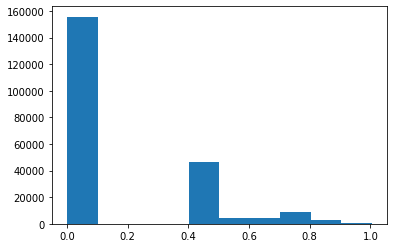

In [144]:
plt.hist(result.flatten())

(array([1.093e+03, 1.000e+00, 2.000e+00, 1.000e+00, 5.300e+02, 1.510e+02,
        7.000e+01, 1.060e+02, 2.330e+02, 5.300e+01]),
 array([0.        , 0.09454098, 0.18908197, 0.28362295, 0.37816393,
        0.47270492, 0.5672459 , 0.6617869 , 0.75632787, 0.8508688 ,
        0.94540983], dtype=float32),
 <a list of 10 Patch objects>)

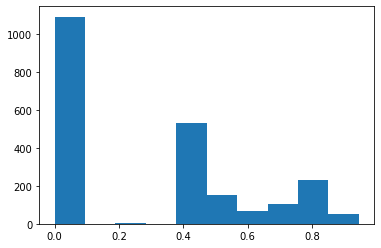

In [95]:
plt.hist(testity[ slicenum, :, :, 0].flatten())

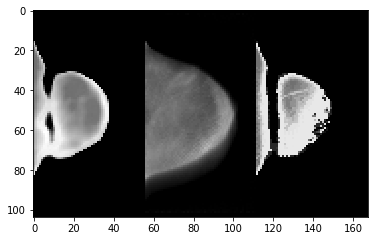

In [89]:
#index = random.randint(0, 35)
#print(index)
slicenum = 38
#plt.imshow(np.concatenate([result[index, :, :, slicenum, 0], valx[index, :, :, slicenum, 0], valy[index, :, :, slicenum, 0]], axis=-1), cmap='gray')
plt.imshow(np.concatenate([result[index, :, :, slicenum, 0], valx[index, :, :, slicenum, 0], valy[index, :, :, slicenum, 0]], axis=-1), cmap='gray')

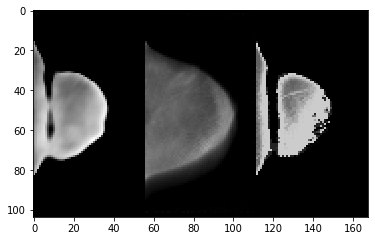

In [90]:
plt.imshow(np.concatenate([result1[index, :, :, slicenum, 0], valx[index, :, :, slicenum, 0], valy[index, :, :, slicenum, 0]], axis=-1), cmap='gray')

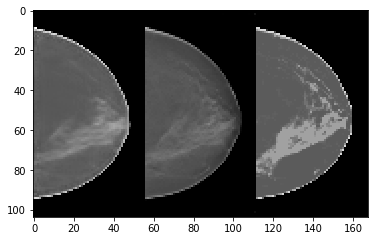

In [56]:
index = random.randint(0, 35)
print(index)
plt.imshow(np.concatenate([result[index, :, :, 20, 0], valx[index, :, :, 20, 0], valy[index, :, :, 20, 0]], axis=-1), cmap='gray')

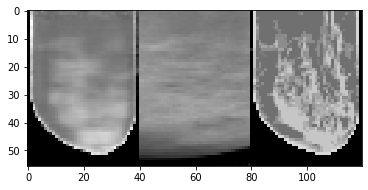

In [73]:
index = random.randint(0, 35)
plt.imshow(np.concatenate([result[index, 50, :, :, 0], valx[index, 50, :, :, 0], valy[index, 50, :, :, 0]], axis=-1), cmap='gray')